# Classification FFNN

## load data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
output_dim = nb_classes = 10
input_dim = (32,32,3)

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)
X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)
X_train /= 255
X_test /= 255
print(input_dim, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, output_dim)

(32, 32, 3) (50000, 3072) (50000, 10) (10000, 3072) (10000, 10) 10


## model create & learning

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import np_utils

In [16]:
def build_model():
    model = Sequential()
    model.add(Dense(16, input_dim=3072, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    return model

In [17]:
model = build_model()

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                49168     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 50,042
Trainable params: 50,042
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
Y_train.shape

(50000, 10)

In [21]:
history = model.fit(X_train, Y_train, batch_size=128,
                    validation_data=(X_test, Y_test),
                    epochs=100, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 60us/sample - loss: 2.1964 - accuracy: 0.1562 - val_loss: 2.1254 - val_accuracy: 0.2197
Epoch 2/100
50000/50000 [==============================] - 3s 53us/sample - loss: 2.0500 - accuracy: 0.2380 - val_loss: 2.0331 - val_accuracy: 0.2448
Epoch 3/100
50000/50000 [==============================] - 2s 50us/sample - loss: 1.9435 - accuracy: 0.2925 - val_loss: 1.9011 - val_accuracy: 0.3160
Epoch 4/100
50000/50000 [==============================] - 3s 55us/sample - loss: 1.8835 - accuracy: 0.3252 - val_loss: 1.8548 - val_accuracy: 0.3300
Epoch 5/100
50000/50000 [==============================] - 4s 72us/sample - loss: 1.8437 - accuracy: 0.3429 - val_loss: 1.8437 - val_accuracy: 0.3388
Epoch 6/100
50000/50000 [==============================] - 3s 61us/sample - loss: 1.8220 - accuracy: 0.3499 - val_loss: 1.8378 - val_accuracy: 0.3311
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 2s 50us/sample - loss: 1.5301 - accuracy: 0.4576 - val_loss: 1.5853 - val_accuracy: 0.4351
Epoch 56/100
50000/50000 [==============================] - 3s 52us/sample - loss: 1.5239 - accuracy: 0.4579 - val_loss: 1.6183 - val_accuracy: 0.4256
Epoch 57/100
50000/50000 [==============================] - 3s 50us/sample - loss: 1.5261 - accuracy: 0.4591 - val_loss: 1.6050 - val_accuracy: 0.4393
Epoch 58/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.5204 - accuracy: 0.4607 - val_loss: 1.5593 - val_accuracy: 0.4445
Epoch 59/100
50000/50000 [==============================] - 3s 55us/sample - loss: 1.5174 - accuracy: 0.4609 - val_loss: 1.5936 - val_accuracy: 0.4343
Epoch 60/100
50000/50000 [==============================] - 3s 55us/sample - loss: 1.5157 - accuracy: 0.4624 - val_loss: 1.5870 - val_accuracy: 0.4389
Epoch 61/100
50000/50000 [==============================] - 3s 53us/sample - loss: 1.5127 - ac

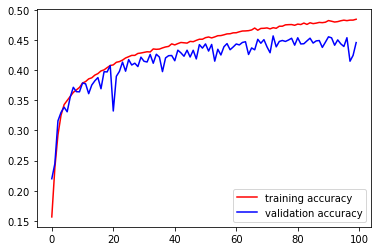

In [23]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

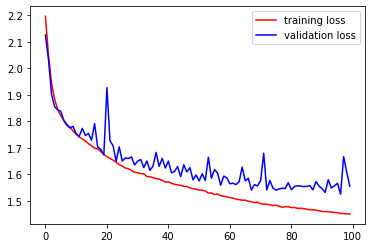

In [22]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

## Inference

In [28]:
predictions = model.predict_classes(X_test)

In [29]:
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[307.2640093261719, 0.386]

In [31]:
y_test = np.argmax(Y_test, axis=1)

## Misclassified Images

In [32]:
index = 0
mis = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        mis.append(index)
    index += 1

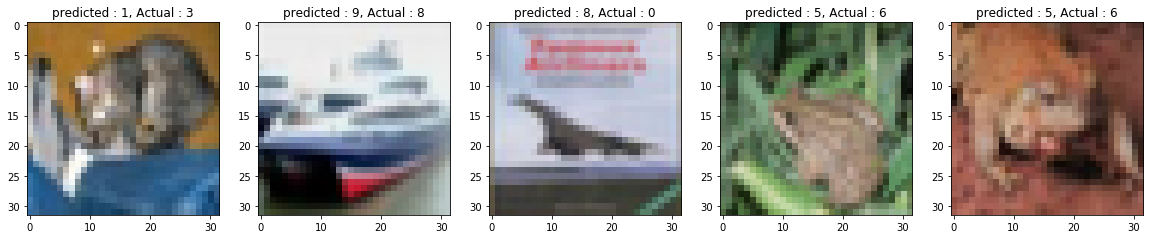

In [33]:
plt.figure(figsize=(20, 4))
for pi, bi in enumerate(mis[:5]):
    plt.subplot(1, 5, pi + 1)
    img = X_test[bi]
    r, g, b = img[0:1024].reshape(32, 32), img[1024:2048].reshape(32, 32), img[2048:].reshape(32, 32)
    im = np.dstack((r, g, b))
    plt.imshow(im)
    plt.title(f"predicted : {predictions[bi]}, Actual : {y_test[bi]}")

## Confusion Matirix

In [34]:
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

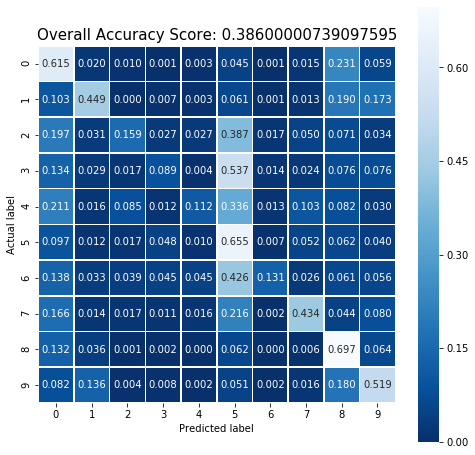

In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();